In [57]:
#Package modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

import time
import math

#Custom modules
from digitclassifier import DigitClassifier, show_image

In [58]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Using MNIST 784 which is small subset of MNIST dataset, containing 70,000 images with flattened image vector of 784x1 each having dimension as 128x128

In [59]:
_x, _y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [60]:
print(_y.view())

['5' '0' '4' ... '4' '5' '6']


In [94]:
x = _x[:1000,:] #Using a slice for initial setup
y = _y[:1000]   #Using a slice for initial setup

x = (x/255).astype('float32')
y = pd.Series(y, dtype="category").cat.codes.values

img_w = 28;
img_l = 28;

print("x.shape = {}".format(x.shape))
print("y.shape = {}".format(y.shape))
print("sample y = {}".format(y))
print("sample y as categorical var = {}".format(y))
print("image width = {}".format(img_w))
print("image length = {}".format(img_l))

assert img_l*img_w == x.shape[1]
input_row_size = x.shape[1]
print("Flattened image dimension same as input row = {}".format(input_row_size))

x.shape = (1000, 784)
y.shape = (1000,)
sample y = [5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 1 2 4 3 2 7 3 8 6 9 0 5 6
 0 7 6 1 8 7 9 3 9 8 5 9 3 3 0 7 4 9 8 0 9 4 1 4 4 6 0 4 5 6 1 0 0 1 7 1 6
 3 0 2 1 1 7 9 0 2 6 7 8 3 9 0 4 6 7 4 6 8 0 7 8 3 1 5 7 1 7 1 1 6 3 0 2 9
 3 1 1 0 4 9 2 0 0 2 0 2 7 1 8 6 4 1 6 3 4 5 9 1 3 3 8 5 4 7 7 4 2 8 5 8 6
 7 3 4 6 1 9 9 6 0 3 7 2 8 2 9 4 4 6 4 9 7 0 9 2 9 5 1 5 9 1 2 3 2 3 5 9 1
 7 6 2 8 2 2 5 0 7 4 9 7 8 3 2 1 1 8 3 6 1 0 3 1 0 0 1 7 2 7 3 0 4 6 5 2 6
 4 7 1 8 9 9 3 0 7 1 0 2 0 3 5 4 6 5 8 6 3 7 5 8 0 9 1 0 3 1 2 2 3 3 6 4 7
 5 0 6 2 7 9 8 5 9 2 1 1 4 4 5 6 4 1 2 5 3 9 3 9 0 5 9 6 5 7 4 1 3 4 0 4 8
 0 4 3 6 8 7 6 0 9 7 5 7 2 1 1 6 8 9 4 1 5 2 2 9 0 3 9 6 7 2 0 3 5 4 3 6 5
 8 9 5 4 7 4 2 7 3 4 8 9 1 9 2 8 7 9 1 8 7 4 1 3 1 1 0 2 3 9 4 9 2 1 6 8 4
 7 7 4 4 9 2 5 7 2 4 4 2 1 9 7 2 8 7 6 9 2 2 3 8 1 6 5 1 1 0 2 6 4 5 8 3 1
 5 1 9 2 7 4 4 4 8 1 5 8 9 5 6 7 9 9 3 7 0 9 0 6 6 2 3 9 0 7 5 4 8 0 9 4 1
 2 8 7 1 2 6 1 0 3 0 1 1 8 2 0 3 9 4 0 5 0 6 1 7 

Visualizing image from MNIST dataset

<Figure size 432x288 with 0 Axes>

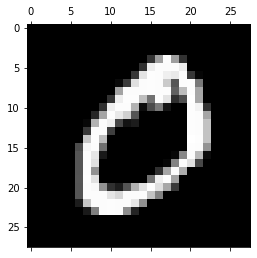

In [95]:
show_image(x[1], img_w, img_l)

In [96]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

Let's visualize train test data

<Figure size 432x288 with 0 Axes>

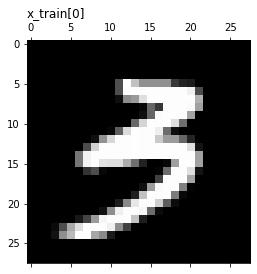

y_train[0] = 3


<Figure size 432x288 with 0 Axes>

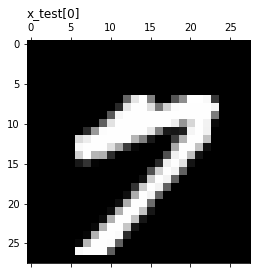

y_test[0] = 7


In [97]:
show_image(x_train[0], img_w, img_l, "x_train[0]")
print(f"y_train[0] = {y_train[0]}")
show_image(x_test[0], img_w, img_l, "x_test[0]")
print(f"y_test[0] = {y_test[0]}")

In [98]:
layer1_size = 128
layer2_size = 64
activation_layer_size = 10;

print("input_row_size = {}".format(input_row_size))
print("layer1_size = {}".format(layer1_size))
print("layer2_size = {}".format(layer2_size))
print("activation_layer_size = {}".format(activation_layer_size))

input_row_size = 784
layer1_size = 128
layer2_size = 64
activation_layer_size = 10


In [100]:
# %load digitclassifier.py
import numpy as np
import time
import matplotlib.pylab as plt


def show_image(x, dim_x, dim_y, title=""):
    plt.gray()
    plt.matshow(x.reshape(dim_x, dim_y))
    plt.title(title, loc="left")
    plt.show()

class DigitClassifier:
    def __init__(self, img_w, img_l, sizes, epochs=10, l_rate=0.001):
        self.img_w = img_w
        self.img_l = img_l
        self.sizes = sizes
        self.epochs = epochs
        self.l_rate = l_rate

        # we save all parameters in the neural network in this dictionary
        self.params = self.initialization()

    def sigmoid(self, x, derivative=False):
        if derivative:
            return (np.exp(-x)) / ((np.exp(-x) + 1) ** 2)
        return 1 / (1 + np.exp(-x))

    def softmax(self, x):
        # Numerically stable with large exponentials
        exps = np.exp(x - x.max())
        return exps / np.sum(exps, axis=0)

    def initialization(self):
        # number of nodes in each layer
        input_layer = self.sizes[0]
        hidden_1 = self.sizes[1]
        hidden_2 = self.sizes[2]
        output_layer = self.sizes[3]

        params = {
            'W1': np.random.randn(hidden_1, input_layer) * np.sqrt(1. / hidden_1),
            'W2': np.random.randn(hidden_2, hidden_1) * np.sqrt(1. / hidden_2),
            'W3': np.random.randn(output_layer, hidden_2) * np.sqrt(1. / output_layer)
        }

        return params

    def forward_pass(self, x_train):
        params = self.params

        # input layer activations becomes sample
        params['A0'] = x_train

        # input layer to hidden layer 1
        params['Z1'] = np.dot(params["W1"], params['A0'])
        params['A1'] = self.sigmoid(params['Z1'])

        # hidden layer 1 to hidden layer 2
        params['Z2'] = np.dot(params["W2"], params['A1'])
        params['A2'] = self.sigmoid(params['Z2'])

        # hidden layer 2 to output layer
        params['Z3'] = np.dot(params["W3"], params['A2'])
        params['A3'] = self.softmax(params['Z3'])

        return params['A3']

    def backward_pass(self, y_train, output):
        '''
            This is the backpropagation algorithm, for calculating the updates
            of the neural network's parameters.

            Note: There is a stability issue that causes warnings. This is
                  caused  by the dot and multiply operations on the huge arrays.

                  RuntimeWarning: invalid value encountered in true_divide
                  RuntimeWarning: overflow encountered in exp
                  RuntimeWarning: overflow encountered in square
        '''
        params = self.params
        change_w = {}

        # Calculate W3 update
        error = output - y_train
        change_w['W3'] = np.dot(error, params['A3'])

        # Calculate W2 update
        error = np.multiply(np.dot(params['W3'].T, error), self.sigmoid(params['Z2'], derivative=True))
        change_w['W2'] = np.dot(error, params['A2'])

        # Calculate W1 update
        error = np.multiply(np.dot(params['W2'].T, error), self.sigmoid(params['Z1'], derivative=True))
        change_w['W1'] = np.dot(error, params['A1'])

        return change_w

    def update_network_parameters(self, changes_to_w):
        '''
            Update network parameters according to update rule from
            Stochastic Gradient Descent.

            θ = θ - η * ∇J(x, y),
                theta θ:            a network parameter (e.g. a weight w)
                eta η:              the learning rate
                gradient ∇J(x, y):  the gradient of the objective function,
                                    i.e. the change for a specific theta θ
        '''

        for key, value in changes_to_w.items():
            for w_arr in self.params[key]:
                w_arr -= self.l_rate * value

    def compute_accuracy(self, x_test, y_test):
        '''
            This function does a forward pass of x, then checks if the indices
            of the maximum value in the output equals the indices in the label
            y. Then it sums over each prediction and calculates the accuracy.
        '''
        predictions = []

        for x, y in zip(x_test, y_test):
            output = self.forward_pass(x)
            pred = np.argmax(output)
            #print(f"Expected = {y}, Predicted = {pred}")
            predictions.append(pred == y)

        summed = sum(pred for pred in predictions) / 100.0
        return np.average(summed)

    def train(self, x_train, y_train, x_test, y_test):
        start_time = time.time()
        for iteration in range(self.epochs):
            for x, y in zip(x_train, y_train):
                output = self.forward_pass(x)
                changes_to_w = self.backward_pass(y, output)
                self.update_network_parameters(changes_to_w)

            accuracy = self.compute_accuracy(x_test, y_test)
            print('Epoch: {0}, Time Spent: {1:.2f}s, Accuracy: {2}'.format(
                iteration + 1, time.time() - start_time, accuracy
            ))


In [101]:
model = DigitClassifier(
    img_w=img_w,
    img_l=img_l,
    sizes=[input_row_size, layer1_size, layer2_size, activation_layer_size],
    epochs=10)
model.train(x_train, y_train, x_test, y_test)

Epoch: 1, Time Spent: 0.45s, Accuracy: 0.13
Epoch: 2, Time Spent: 0.90s, Accuracy: 0.13
Epoch: 3, Time Spent: 1.36s, Accuracy: 0.13
Epoch: 4, Time Spent: 1.81s, Accuracy: 0.13
Epoch: 5, Time Spent: 2.27s, Accuracy: 0.13
Epoch: 6, Time Spent: 2.72s, Accuracy: 0.13
Epoch: 7, Time Spent: 3.18s, Accuracy: 0.13
Epoch: 8, Time Spent: 3.63s, Accuracy: 0.13
Epoch: 9, Time Spent: 4.08s, Accuracy: 0.13
Epoch: 10, Time Spent: 4.54s, Accuracy: 0.13


### Results

The results are varying currently from 10%-30% depending on the variations in the parameters.



### Model Storage

Saving the model object for the inference pipeline

In [102]:
from joblib import dump
dump(model, 'model.joblib')

['model.joblib']